In [45]:
# gzip is a pacakge for opening/making gz files
import gzip
# import plt for plotting
import matplotlib.pyplot as plt
# import numpy for Array creation/manipulation
import numpy as np
# import os for working with local files
import os
# pandas is a package for creating / editing data frames
import pandas as pd
# seaborn is a statistical plotting package
import seaborn as sns

# generate plots in the jupyter notebook
%matplotlib inline


In [46]:
# Path to folder containing the raw data
DATA_DIR = '../data/'
# File name of the raw data
DATA_FILENAME_1 = 'eset_HTA20.csv'
DATA_FILENAME_2 = 'eset_HuGene21ST.csv'

# Load the data into a dataframe
df1 = pd.read_csv(
    # This creates the full path to the file
    '{}{}'.format(DATA_DIR, DATA_FILENAME_1)
    # Ignore lines that start with '!'
    , comment='\t',
    # the character used to separate values
    sep=',',
    
)

df2 = pd.read_csv(
    # This creates the full path to the file
    '{}{}'.format(DATA_DIR, DATA_FILENAME_2)
    # Ignore lines that start with '!'
    , comment='\t',
    # the character used to separate values
    sep=',',
    
)

In [47]:
# Path to folder containing the raw data
DATA_DIR = '../data/'
# File name of the raw data
DATA_FILENAME = 'anoSC2_v20_filtered.csv'
# Load the data into a dataframe
df3 = pd.read_csv(
    # This creates the full path to the file
    '{}{}'.format(DATA_DIR, DATA_FILENAME)
    # Ignore lines that start with '!'
    , comment='\t',
    # the character used to separate values
    sep=',',
    
)

In [101]:
f = ['Unnamed: 0']
for sample in list(df3['SampleID']):
    if sample[:3] != "GSM":
        f.append(sample)
tarca_sample_df = df1[f]
#tarca_sample_df.shape

In [102]:
f = ['Unnamed: 0']
for sample in list(df3['SampleID']):
    if sample[:3] == "GSM":
        f.append(sample)
GSM_df = df2[f]
#GSM_df.shape

In [103]:
common_genes = set(list(tarca_sample_df['Unnamed: 0'])).intersection(list(GSM_df['Unnamed: 0'])) 
tarca_sample_df = tarca_sample_df.set_index('Unnamed: 0')
GSM_df = GSM_df.set_index('Unnamed: 0')

In [104]:
print(tarca_sample_df.shape)
print(GSM_df.shape)

(32830, 115)
(29635, 320)


In [105]:
tarca_sample_df = tarca_sample_df.loc[common_genes]
tarca_sample_df.shape

(29459, 115)

In [106]:
GSM_df = GSM_df.loc[common_genes]
GSM_df.shape

(29459, 320)

In [128]:
combined_df = pd.concat([tarca_sample_df, GSM_df],sort = True,axis =1)
combined_df.shape

(29459, 435)

In [120]:
import sys 
combined_df.to_csv('{}{}'.format('../data/', 'combined_df.csv'))


In [129]:
odf = combined_df.copy(deep=True)
# add two new columns containing the mean and std for each row respectively
combined_df[['mean', 'std']] = combined_df.agg(
    ['mean', 'std'], axis=1
)
#normalization using z score
#def z_score(x, u, s):
#    return (x - u)/s

#for index, row in combined_df.iterrows():
#    for column in combined_df.columns[:-2]:
#        combined_df.at[index,column] = z_score(combined_df.at[index,column],row['mean'],row['std'])

#import sys 
#combined_df.to_csv('{}{}'.format('../data/', 'combined_df_z_normalized.csv'))

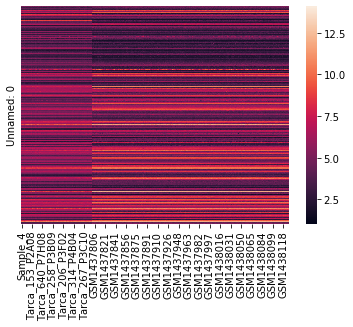

In [130]:
sns.heatmap(data=combined_df.drop([combined_df.columns[-1],combined_df.columns[-2]],axis = 1), yticklabels=False)

In [132]:
tarca_sample_df



,Sample_4,Sample_5,Sample_10,Sample_11,Sample_13,Sample_14,Sample_19,Sample_20,Sample_25,Sample_26,...,Tarca_597_P7E03,Tarca_641_P7A09,Tarca_492_P6D02,Tarca_491_P6C02,Tarca_506_P6B04,Tarca_920_P10H07,Tarca_919_P10G07,Tarca_918_P10F07,Tarca_917_P10E07,Tarca_916_P10D07
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
112869_at,7.292839,7.492886,6.813558,6.740263,6.829126,6.546700,6.758206,6.963136,6.593613,6.916166,...,6.621822,6.613296,7.031742,7.153819,6.951189,6.882837,6.905952,6.909243,6.822587,6.706643
338324_at,3.568636,4.009735,3.869264,4.229584,3.990738,3.924254,3.928270,3.603932,3.903091,3.650804,...,3.933701,3.627182,3.806090,3.683705,3.550852,3.582235,3.745318,3.408073,3.671061,3.805591
105374149_at,2.476974,2.747585,2.931026,2.713749,2.900336,3.223972,2.767708,2.642655,2.735722,2.877165,...,2.889279,2.767641,2.646999,2.772635,2.751078,2.761613,3.042096,2.816980,2.893620,2.813979
107984663_at,4.645098,4.608613,4.664620,4.574437,4.346247,4.333122,4.806269,4.556248,4.855522,4.732637,...,4.176464,4.686046,4.129795,4.216010,4.303775,4.546778,4.804395,4.568584,5.146474,4.973141
257194_at,3.241994,3.498683,3.568491,3.457261,3.632897,3.630172,3.336413,3.367531,3.438853,3.487091,...,3.550662,3.503729,3.288966,3.290574,3.446696,3.371609,3.445487,3.369146,3.688517,3.613032
309_at,8.300976,8.283793,7.984000,7.990689,7.438906,7.799102,7.931546,8.030521,8.321920,8.235119,...,7.731266,7.931378,8.340254,8.614584,8.502932,8.378628,8.234803,8.218217,8.219193,8.139181
57728_at,4.544100,4.395991,4.531651,4.403480,4.623766,4.604980,4.489436,4.359059,4.478552,4.464147,...,4.327494,4.474890,4.702495,4.675410,4.530137,4.472454,4.372089,4.511987,4.410908,4.419350
645212_at,5.853000,5.719462,6.089825,5.791557,5.818664,5.461768,5.683913,5.937536,5.940323,5.860204,...,6.132963,5.933950,5.792181,5.979126,5.988793,5.947404,6.039609,5.939563,6.133913,6.046119
127385_at,2.740684,2.875324,2.923121,2.872851,2.959056,3.517868,3.033951,2.936254,2.704904,2.756952,...,2.942366,3.038192,2.985667,3.045411,3.137467,2.914930,2.656785,2.885919,3.081517,3.006720


In [126]:
# calculate welch's t test using the mean's and std's
#            m_1 - m_2
# t =    __________________
#          ________________
#         |std_1     std_2
#         |-----  +  ----
#       \/ num_1     num2
def welch_t_test(row):
    return (
        (row['ALL_mean'] - row['AML_mean']) / 
        np.sqrt(
            row['ALL_std']/len(ALL_samples) + row['AML_std']/len(AML_samples)
        )
    )


#seperate the samples 
samples = list()
for column in df:
    samples.append(column)
ALL_samples = samples[:27]
AML_samples = samples[27:38]
# add two new columns containing the mean and std for each row respectively
df[['ALL_mean', 'ALL_std']] = df[ALL_samples].agg(
    ['mean', 'std'], axis=1
)
# The same as above but for carcinoma samples
df[['AML_mean', 'AML_std']] = df[AML_samples].agg(
    ['mean', 'std'], axis=1
)

# create a column called similarity containing the results of the t test
df['similarity'] = df[['ALL_mean', 'ALL_std', 'AML_mean', 'AML_std']].apply(welch_t_test, axis=1)
# sort the data using the similarity
# . once sorted we dont need any of the values used to calculate the similarity
# . This returns a dataframe containing only expression values
df_sorted = df.sort_values('similarity').drop(columns=['mean','std','ALL_mean', 'ALL_std', 'AML_mean', 'AML_std', 'similarity'])
df.head()

,GSM1437802,GSM1437801,GSM1437804,GSM1437803,GSM1437806,GSM1437805,GSM1437808,GSM1437807,GSM1437810,GSM1437809,...,GSM1438118,GSM1438117,GSM1438120,GSM1438119,GSM1438122,GSM1438121,GSM1438124,GSM1438123,GSM1438126,GSM1438125
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
112869_at,8.841191,8.982203,8.982900,8.987924,8.856012,8.635292,8.821779,8.766035,8.955322,8.894847,...,8.686419,8.874419,8.905839,8.612873,9.179010,9.123192,8.889178,8.865067,8.858647,9.115107
338324_at,4.797535,4.337930,4.605524,3.834107,4.810727,5.082601,4.350857,4.280092,4.269314,5.110962,...,4.539314,4.275746,4.088976,4.773140,4.364118,4.385060,3.922552,4.493067,4.075369,4.089272
105374149_at,3.955423,4.214352,3.888333,4.024814,4.655347,4.747877,4.167248,4.062232,4.351215,4.613512,...,3.882557,4.080873,4.098771,4.614465,4.166977,4.308578,3.893420,4.486462,4.421537,5.012228
107984663_at,3.783941,4.212919,3.850534,3.761632,3.905956,4.261521,3.624997,3.735945,3.584122,3.626959,...,4.014534,4.150541,4.324061,3.937813,4.370609,4.476770,3.540467,3.474104,4.096092,4.165588
257194_at,4.165516,4.353121,4.873505,4.873248,4.511100,4.538512,4.743949,4.708326,4.796107,4.577245,...,4.124996,4.170953,4.626318,4.799076,4.599206,4.453476,4.520399,4.342387,4.666907,4.364840
309_at,10.802414,10.528916,11.056674,11.136031,10.527944,11.037992,10.649651,10.853899,10.626777,10.673095,...,10.783460,11.042959,11.017709,10.697879,10.884386,10.722440,11.231515,10.755045,10.763005,10.944671
57728_at,6.407602,6.363621,6.514381,6.241591,5.966015,5.992540,6.154823,6.351716,6.200710,6.055441,...,6.100569,6.441972,6.380107,6.142207,6.279388,6.259555,6.082368,6.328348,6.105557,6.071949
645212_at,7.434341,7.136423,7.247936,6.907350,7.008748,7.087681,6.989434,7.247246,6.794720,6.819255,...,6.826364,7.045409,6.962691,7.128305,7.041582,7.172922,7.067472,7.080587,7.185811,6.632951
127385_at,2.039120,2.225925,2.415631,2.158474,3.046852,2.593486,3.537432,2.498110,1.868298,1.868298,...,2.181341,2.067007,2.185941,3.374161,2.383902,2.204424,3.105651,3.020739,2.426875,3.108478


In [ ]:
sns.heatmap(data=df.drop([df.columns[-1],df.columns[-2]],axis = 1), yticklabels=False)